## Booleabayes Example Usage
Function call types:
* `load` = loading data
* `proc` = processing
* `rw` = random walk
* `plot` = plotting
* `tl` = tools
* `utils` = utilities

In [6]:
import sys
import os
import time
import random
import os.path as op
from datetime import timedelta

from load import *
import proc
import plot
import rw
import tl
import utils as ut

In [7]:
# Input data locations
DATA_DIR = './test_data'
network_path = 'loopy_network_simplified.csv'
data_t0_path = 'train_t0_tumor.csv'
data_t1_path = 'train_t1_tumor.csv'
data_test_t0_path = 'test_t0_tumor.csv'
data_test_t1_path = 'test_t1_tumor.csv'
cellID_table = 'network_clusters_tumor.csv'

# Output directories
VAL_DIR = './test_data/validation'
OUTPUT_DIR = './test_data/output'

## Load Network

In [8]:
# Load the tf network and generate a graph using graph-tool
graph, vertex_dict = load_network(f'{DATA_DIR}/{network_path}', remove_sinks=False, 
                                  remove_selfloops=False, remove_sources=False)

# Maps: vertex -> name (basically the inverse of vertex_dict)
v_names, nodes = ut.get_nodes(vertex_dict, graph)

In [9]:
graph

<Graph object, directed, with 35 vertices and 257 edges at 0x7fc060444400>

## Load Data and Clusters
* The `ut.get_clusters()` function to handle creating the cluster dataframe
    - The function checks for a `cellID` table and column headers to create the dataframe
    - If no `cellID` table is passed the dataframe is created using the data index with one `class` column filled with zero's
* Example function call with data that is already split into train/test:

```python
clusters = ut.get_clusters(data_train, data_test, is_data_split=True, 
                           cellID_table="cellID_table.csv",
                           cluster_header_list=cluster_header_list)
```
* Example function call with no `cellID` table:

```python
clusters = ut.get_clusters(data_t0)
```
* View output format in `./test_data/output`:
    - train_t0_cline.csv
    - train_t1_cline.csv
    - test_t0_cline.csv
    - test_t1_cline.csv
    - test_train_indeces_cline.p

In [10]:
# Assign headers to cluster csv, with one called "class"
cluster_header_list = ['class']
node_normalization = 0.3
transpose = True

data_t0 = load_data(f'{DATA_DIR}/{data_t0_path}', nodes, norm=node_normalization, 
                    delimiter=',', log1p=False, transpose=transpose, 
                    sample_order=False, fillna=0)

data_t1 = load_data(f'{DATA_DIR}/{data_t1_path}', nodes, norm=node_normalization, 
                    delimiter=',', log1p=False, transpose=transpose, 
                    sample_order=False, fillna=0)

# Only need to pass 'data_t0' since this data is not split into train/test
clusters = ut.get_clusters(data_t0, cellID_table=f"{DATA_DIR}/{cellID_table}", 
                           cluster_header_list=cluster_header_list)

data_t0, data_test_t0, data_t1, data_test_t1, clusters_train, clusters_test = ut.split_train_test(data_t0, data_t1, clusters,
                                                                                                  OUTPUT_DIR, fname='cline')

In [11]:
data_t0


,ASCL1,BCL3,CEBPD,EBF1,ELF3,FLI1,FOXA1,FOXA2,GATA4,GFI1B,...,REST,SIX5,SMAD4,SOX11,STAT6,TCF3,TCF4,TEAD4,YAP1,ZNF217
/scratch/h_vangard_1/daix4/Ken/20200121_indropv2_human_dropEst/velocyto_result/236D_236D_V300044428:AGAAGTGCCTGGCTACC-Tumor1,1.000000,0.000000,1.000000,0.724537,1.000000,0.878450,1.00000,1.000000,1.000000,0.0,...,0.078081,0.0,1.000000,1.000000,0.535026,1.000000,0.000000,0.000000,1.000000,0.567199
/scratch/h_vangard_1/daix4/Ken/20200121_indropv2_human_dropEst/velocyto_result/236D_236D_V300044428:AGAGACTATTGCACGC-Tumor1,0.718504,0.289953,0.000000,0.220354,0.000000,0.000000,0.00000,0.194737,1.000000,0.0,...,1.000000,0.0,0.714874,1.000000,0.000000,0.000000,1.000000,0.392892,0.000000,0.000000
/scratch/h_vangard_1/daix4/Ken/20200121_indropv2_human_dropEst/velocyto_result/236D_236D_V300044428:AGAAGTGCCTTCCGCTC-Tumor1,1.000000,0.301720,0.485561,1.000000,0.364141,0.000000,0.88668,0.755498,1.000000,0.0,...,0.000000,0.0,1.000000,0.929262,0.000000,0.535405,0.992617,0.000000,0.000000,0.381004
/scratch/h_vangard_1/daix4/Ken/20200121_indropv2_human_dropEst/velocyto_result/236D_236D_V300044428:AGAAGTGCCCTATAGAG-Tumor1,1.000000,0.447667,0.658437,1.000000,0.935245,0.368393,1.00000,0.957766,0.589167,0.0,...,0.385136,0.0,0.206352,0.633386,0.000000,0.363835,0.632592,0.000000,0.696869,0.277780
/scratch/h_vangard_1/daix4/Ken/20200121_indropv2_human_dropEst/velocyto_result/236D_236D_V300044428:AGAGACTATGTGGCTA-Tumor1,0.000000,1.000000,0.000000,0.000000,0.000000,0.081104,0.00000,0.000000,0.038821,0.0,...,1.000000,0.0,0.000000,0.409900,0.000000,0.000000,0.000000,0.000000,0.922531,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3359-PK-1-GCCAAT-ATCAGT_S1_L001:TGATCCCTGATTGCTATTTx-Tumor2,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.0,...,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
3359-PK-1-GCCAAT-ATCAGT_S1_L001:TGAGTCGTCGTATATAGGAx-Tumor2,0.000000,1.000000,0.000000,0.463410,0.000000,1.000000,0.00000,0.000000,1.000000,0.0,...,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
3359-PK-1-GCCAAT-ATCAGT_S1_L001:TGATCACCGAGTCCAGGGAx-Tumor2,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.0,...,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
3359-PK-1-GCCAAT-ATCAGT_S1_L001:TGATAACCCGTTGTTCCAGx-Tumor2,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.514897,0.0,...,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000


## Binarize data
* The `save` parameter in `proc.binararize_data()` lets users determine if they want the binarized data written to a location sepcified by `save_dir` and `fname`
* View output format in `./test_data/output`:
    - binarized_data_t0.csv
    - binarized_data_t1.csv
    - binarized_data_test_t0.csv
    - binarized_data_test_t1.csv

In [12]:
binarized_data_t0 = proc.binarize_data(data_t0, phenotype_labels=clusters, save=True,
                                       save_dir=OUTPUT_DIR, fname='binarized_data_t0')

binarized_data_t1 = proc.binarize_data(data_t1, phenotype_labels=clusters, save=True, 
                                       save_dir=OUTPUT_DIR, fname='binarized_data_t1')

binarized_data_test_t0 = proc.binarize_data(data_test_t0, phenotype_labels=clusters, save=True,
                                            save_dir=OUTPUT_DIR, fname='binarized_data_test_t0')

binarized_data_test_t1 = proc.binarize_data(data_test_t1, phenotype_labels=clusters, save=True, 
                                            save_dir=OUTPUT_DIR, fname='binarized_data_test_t1')

## Fit rules with training dataset
**Option 1:** Calculate rules using `tl.get_rules_scvelo()` or `tl.get_rules()`
* User has the option to plot and save the rules using the following function arguments:
    - `plot` - determines if the plots should be created 
    - `show_plot` - determines if the plots should be shown in std. out
    - `save_plot` - determines if the plots should be saved
    - `save_dir` - file path to save the plots
* View output format in `./test_data/output`:
    - rule_plots/*
    - rules.txt
    - strengths.csv
    - signed_strengths.csv

In [14]:
# Don't remove any parents
node_threshold = 0  

# Note: this step may take a while
rules, regulators_dict, strengths, signed_strengths = tl.get_rules_scvelo(data_t0, data_t1, vertex_dict, 
                                                             plot=True, show_plot=False, save_plot=True,
                                                             save_dir=f'{OUTPUT_DIR}/rule_plots', threshold=node_threshold)
# Save rules to text file 
tl.save_rules(rules, regulators_dict, fname=f'{OUTPUT_DIR}/rules.txt')

strengths.to_csv(f'{OUTPUT_DIR}/strengths.csv')
signed_strengths.to_csv(f'{OUTPUT_DIR}/signed_strengths.csv')

**Option 2:** Load existing rules from file using `load.load_rules()`

In [15]:
rules, regulators_dict = load_rules(fname=f'{OUTPUT_DIR}/rules.txt')

## Perform Validation and Plot Accuracy Metrics

**Option 1**: User can perform validation on test data by calling accuracy functions individually

In [ ]:
# Example generating validation output file 
outfile = open(f"{OUTPUT_DIR}/tprs_fprs.csv", 'w+')

ind = [x for x in np.linspace(0, 1, 50)]
tpr_all = pd.DataFrame(index=ind)
fpr_all = pd.DataFrame(index=ind)
area_all = []

outfile.write(f",,")
for j in ind:
    outfile.write(str(j)+',')
outfile.write('\n')

for g in nodes:
    print(g)
    validation = plot.plot_accuracy_scvelo(data_test_t0,data_test_t1, g, regulators_dict, rules, 
                                           save_dir=VAL_DIR, save=True, save_df=True)
    
    tprs, fprs, area = tl.roc(validation, g, n_thresholds=50)
    tpr_all[g] = tprs
    fpr_all[g] = fprs
    outfile.write(f"{g},tprs,{tprs}\n")
    outfile.write(f"{g},fprs,{fprs}\n")
    area_all.append(area)

outfile.close()

**Option 2**: User can call the `tl.fit_validation()` to do all of the same steps in one call
* User can specify whether to show and/or save the plots (this example saves the plots but does not show them here)
* View output format in `./test_data/validation`:
    - tprs_fprs.csv
    - accuracy_plots (csv and pdf)

In [ ]:
validation, tprs_all, fprs_all, area_all = tl.fit_validation(data_test_t0, data_test_t1, nodes, regulators_dict, rules, 
                                                             save=True, save_dir=VAL_DIR, show_plots=False, save_df=True)

**AUC Plots**
* View output format in `./test_data/validation`:
    - aucs.csv
    - aucs_plot.pdf
    - ROC_AUC_average.pdf

In [10]:
# Saves auc values for each gene (node) in the passed directory as 'aucs.csv'
tl.save_auc_by_gene(area_all, nodes, VAL_DIR)

AUC means:  0
ASCL1      0.957131
BCL3       0.917031
CEBPD      0.840360
EBF1       0.927168
ELF3       0.921738
FLI1       0.979008
FOXA1      0.980705
FOXA2      0.993918
GATA4      0.864254
GFI1B      0.848854
HES1       0.913961
ISL1       0.987215
KLF2       0.972740
MITF       0.906736
MYC        0.903447
MYCN       0.918485
NEUROD1    0.000000
NEUROD2    0.856313
NR0B1      0.698491
NR0B2      0.898675
OLIG2      0.939064
POU2F3     0.818254
RARG       0.946178
RBPJ       0.914529
RCOR2      0.933696
REST       0.968985
SIX5       0.000000
SMAD4      0.974962
SOX11      0.934998
STAT6      0.922167
TCF3       0.975092
TCF4       0.962280
TEAD4      0.930547
YAP1       0.782971
ZNF217     0.882125
dtype: float64


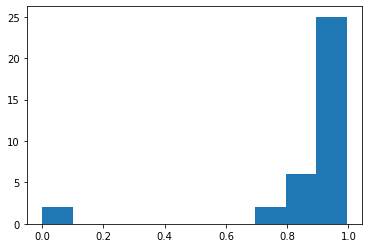

In [18]:
# Plot aucs
n = len(nodes)
aucs = pd.read_csv(f'{VAL_DIR}/aucs.csv', header=None, index_col=0)
print("AUC means: ",aucs.mean(axis = 1))

plot.plot_aucs(aucs, save=True, save_dir=VAL_DIR, show_plot=True)

In [13]:
# Function to calculate roc and tpr, fpr, area from saved validation files
tpr_all, fpr_all, area_all = tl.roc_from_file(f'{VAL_DIR}/accuracy_plots', nodes, save=True, save_dir=VAL_DIR)

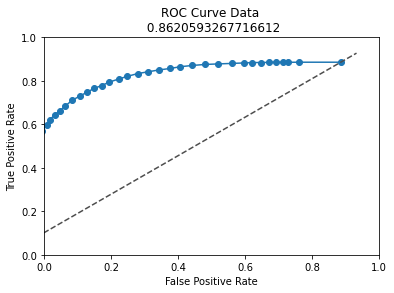

In [14]:
plot.plot_validation_avgs(fpr_all, tpr_all, len(nodes), area_all, save=True, save_dir=VAL_DIR, show_plot=True)

## Get attractors and set phenotypes using nearest neighbors
* `ut.find_avg_states()` returns a dictionary of the average states and calls `get_avg_state_index()` to handle average state index files
* View output format in `./test_data/output`:
    - average_states.txt
    - average_states_idx_Tumor1.txt
    - average_states_idx_Tumor2.txt
    - average_states.pdf

**Find average states**

Average states:  {'Tumor1': 22959801556, 'Tumor2': 11366119971}


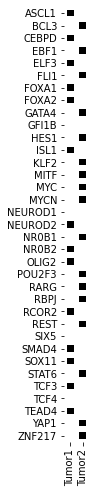

In [22]:
# Find average states from binarized data and write the avg state index files
average_states = tl.find_avg_states(binarized_data_t0, nodes, save_dir=OUTPUT_DIR)
print('Average states: ', average_states)

# Plot average state for each subtype
plot.plot_attractors(f'{OUTPUT_DIR}/average_states.txt', save_dir=OUTPUT_DIR)

**Find Attractors**
* The `tl.find_attractors()` function checks if `tf_basin < 0` and calculates the average minimum distance dictionary
* If `tf_basin is not < 0` , it uses the constant integer value
* `tl.write_attractor_dict()` writes an attractor dictionary to the specified output file location
* View output format in `./test_data/output`:
    - attractors_Tumor1.txt
    - attractors_Tumor2.txt

In [ ]:
tf_basin = -1
on_nodes = []
off_nodes = []

start = time.time()
 
attractor_dict = tl.find_attractors(binarized_data_t0, rules, nodes, regulators_dict, tf_basin=tf_basin, 
                                    save_dir=OUTPUT_DIR, on_nodes=on_nodes, off_nodes=off_nodes)
end = time.time()
print('Time to find attractors: ', str(timedelta(seconds=end-start)))

**Save and Plot Attractors** 
* View output format in `./test_data/output`:
    - attractors_unfiltered.txt
    - attractors_unfiltered.pdf

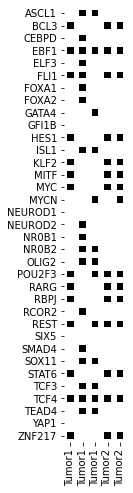

In [17]:
outfile = open(f'{OUTPUT_DIR}/attractors_unfiltered.txt', 'w+')
tl.write_attractor_dict(attractor_dict, nodes, outfile)

# Plot average state for each subtype
plot.plot_attractors(f'{OUTPUT_DIR}/attractors_unfiltered.txt')